In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
features = pd.read_excel(r"C:\Users\hadgi\Documents\features.xlsx")

In [3]:
features.tail()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False
8189,45,2013-07-26,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,False


In [4]:
train = pd.read_excel(r"C:\Users\hadgi\Documents\train.xlsx")

In [5]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [6]:
test = pd.read_excel(r"C:\Users\hadgi\Documents\test.xlsx")

In [7]:
test.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [8]:
stores = pd.read_excel(r"C:\Users\hadgi\Documents\stores.xlsx")

In [9]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [10]:
#merging stores dataset into the features dataset 
features = features.merge(stores, on = 'Store')

def merged_data(data):
    df = data.merge(features, on = ['Store', 'Date', 'IsHoliday']).sort_values(by = ['Store', 'Dept', 'Date']).reset_index(drop = True)
    df.drop([i for i in df.columns if 'e_' in i],
               axis=1, inplace=True)
    return df

In [11]:
train_df, test_df = merged_data(train), merged_data(test)

In [12]:
display(train_df.sample(5).sort_values(by = 'Store').reset_index(drop = True))

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,11,18,2012-04-13,13527.44,False,72.74,3.891,8906.38,4722.18,9.86,1412.83,2772.79,225.013556,6.664,A,207499
1,24,38,2010-10-01,59803.35,False,66.88,2.840,NaN,NaN,NaN,NaN,NaN,132.756800,8.275,A,203819
2,30,13,2012-04-06,11140.03,False,69.02,3.891,21.39,NaN,4.09,NaN,2364.16,221.073764,6.891,C,42988
3,32,58,2010-07-30,1837.00,False,75.62,2.690,NaN,NaN,NaN,NaN,NaN,189.936850,9.017,A,203007
4,38,11,2010-08-13,631.31,False,87.01,3.159,NaN,NaN,NaN,NaN,NaN,126.064000,14.180,C,39690


In [13]:
#convert IsHoliday to either a 0 for false or 1 for true
def convert_boolean(data):
    data['IsHoliday'] = data['IsHoliday'].map({False : 0, True : 1}).astype('int')
    return data

In [14]:
train_df, test_df = convert_boolean(train_df), convert_boolean(test_df)

In [15]:
train_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,1,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,0,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,0,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,0,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315


In [16]:
test_df.tail()

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
115059,45,98,2013-06-28,0,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,B,118221
115060,45,98,2013-07-05,0,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,B,118221
115061,45,98,2013-07-12,0,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,B,118221
115062,45,98,2013-07-19,0,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,B,118221
115063,45,98,2013-07-26,0,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,B,118221


In [17]:
#checking for missing or nan values
train_df.isna().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
Type                 0
Size                 0
dtype: int64

In [18]:
#replace nan values with 0
def replace_nan_value(data):
    columns_with_nan = ['MarkDown1', 'MarkDown2','MarkDown3','MarkDown4','MarkDown5']
    data[columns_with_nan] = data[columns_with_nan].fillna(0)
    return data

In [19]:
train_df, test_df = replace_nan_value(train_df), replace_nan_value(test_df)

In [20]:
train_df.tail()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
421565,45,98,2012-09-28,508.37,0,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,B,118221
421566,45,98,2012-10-05,628.10,0,64.89,3.985,5046.74,0.00,18.82,2253.43,2340.01,192.170412,8.667,B,118221
421567,45,98,2012-10-12,1061.02,0,54.47,4.000,1956.28,0.00,7.89,599.32,3990.54,192.327265,8.667,B,118221
421568,45,98,2012-10-19,760.01,0,56.47,3.969,2004.02,0.00,3.18,437.73,1537.49,192.330854,8.667,B,118221
421569,45,98,2012-10-26,1076.80,0,58.85,3.882,4018.91,58.08,100.00,211.94,858.33,192.308899,8.667,B,118221


In [21]:
#splitting the date into year, month, and day
def split_dates(df):
    df['Date'] = pd.to_datetime(df['Date'])
    df['Year'] = df.Date.dt.year
    df['Month'] = df.Date.dt.month
    df['Day'] = df.Date.dt.day
    df['Quarter'] = df.Date.dt.quarter
    df['WeekOfYear'] = (df.Date.dt.isocalendar().week) * 1.0
    df = df.drop(columns = ['Date'])
    return df

In [22]:
train_df, test_df = split_dates(train_df), split_dates(test_df)

In [23]:
train_df.describe()

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,Year,Month,Day,Quarter,WeekOfYear
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.0
mean,22.200546,44.260317,15981.258123,0.070358,60.090059,3.361027,2590.074819,879.974298,468.087665,1083.132268,1662.772385,171.201947,7.960289,136727.915739,2010.968591,6.449510,15.673131,2.482767,25.826762
std,12.785297,30.492054,22711.183519,0.255750,18.447931,0.458515,6052.385934,5084.538801,5528.873453,3894.529945,4207.629321,39.159276,1.863296,60980.583328,0.796876,3.243217,8.753549,1.071341,14.151887
min,1.000000,1.000000,-4988.940000,0.000000,-2.060000,2.472000,0.000000,-265.760000,-29.100000,0.000000,0.000000,126.064000,3.879000,34875.000000,2010.000000,1.000000,1.000000,1.000000,1.0
25%,11.000000,18.000000,2079.650000,0.000000,46.680000,2.933000,0.000000,0.000000,0.000000,0.000000,0.000000,132.022667,6.891000,93638.000000,2010.000000,4.000000,8.000000,2.000000,14.0
50%,22.000000,37.000000,7612.030000,0.000000,62.090000,3.452000,0.000000,0.000000,0.000000,0.000000,0.000000,182.318780,7.866000,140167.000000,2011.000000,6.000000,16.000000,2.000000,26.0
75%,33.000000,74.000000,20205.852500,0.000000,74.280000,3.738000,2809.050000,2.200000,4.540000,425.290000,2168.040000,212.416993,8.572000,202505.000000,2012.000000,9.000000,23.000000,3.000000,38.0
max,45.000000,99.000000,693099.360000,1.000000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000,2012.000000,12.000000,31.000000,4.000000,52.0


In [24]:
#merging the markdowns into one column since we are not concerned with the type of markdown but merely markdown in general
def mark_down_merge(df):
    df['MarkDown'] = df['MarkDown1'] + df['MarkDown2'] + df['MarkDown3'] + df['MarkDown4'] + df['MarkDown5']
    df.drop(['MarkDown1' , 'MarkDown2' , 'MarkDown3' , 'MarkDown4' , 'MarkDown5'], axis = 1, inplace = True)
    return df


In [25]:
train_df, test_df = mark_down_merge(train_df) , mark_down_merge(test_df)

In [26]:
train_df.tail()

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,Year,Month,Day,Quarter,WeekOfYear,MarkDown
421565,45,98,508.37,0,64.88,3.997,192.013558,8.684,B,118221,2012,9,28,3,39.0,9468.01
421566,45,98,628.10,0,64.89,3.985,192.170412,8.667,B,118221,2012,10,5,4,40.0,9659.00
421567,45,98,1061.02,0,54.47,4.000,192.327265,8.667,B,118221,2012,10,12,4,41.0,6554.03
421568,45,98,760.01,0,56.47,3.969,192.330854,8.667,B,118221,2012,10,19,4,42.0,3982.42
421569,45,98,1076.80,0,58.85,3.882,192.308899,8.667,B,118221,2012,10,26,4,43.0,5247.26


In [27]:
def isholiday(df):
    
    holiday_weeks = [1, 3, 6, 8, 22, 27, 36, 41, 46, 47, 52]
    df.loc[df['WeekOfYear'].isin(holiday_weeks), 'IsHoliday'] = 1
    
    return df

In [28]:
train_df, test_df = isholiday(train_df), isholiday(test_df)

In [29]:
train_df.head()

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,Year,Month,Day,Quarter,WeekOfYear,MarkDown
0,1,1,24924.50,0,42.31,2.572,211.096358,8.106,A,151315,2010,2,5,1,5.0,0.0
1,1,1,46039.49,1,38.51,2.548,211.242170,8.106,A,151315,2010,2,12,1,6.0,0.0
2,1,1,41595.55,0,39.93,2.514,211.289143,8.106,A,151315,2010,2,19,1,7.0,0.0
3,1,1,19403.54,1,46.63,2.561,211.319643,8.106,A,151315,2010,2,26,1,8.0,0.0
4,1,1,21827.90,0,46.50,2.625,211.350143,8.106,A,151315,2010,3,5,1,9.0,0.0


C:\Users\hadgi\AppData\Local\Temp\ipykernel_20476\110135033.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_df.corr(), annot=True, annot_kws={'size': 10})


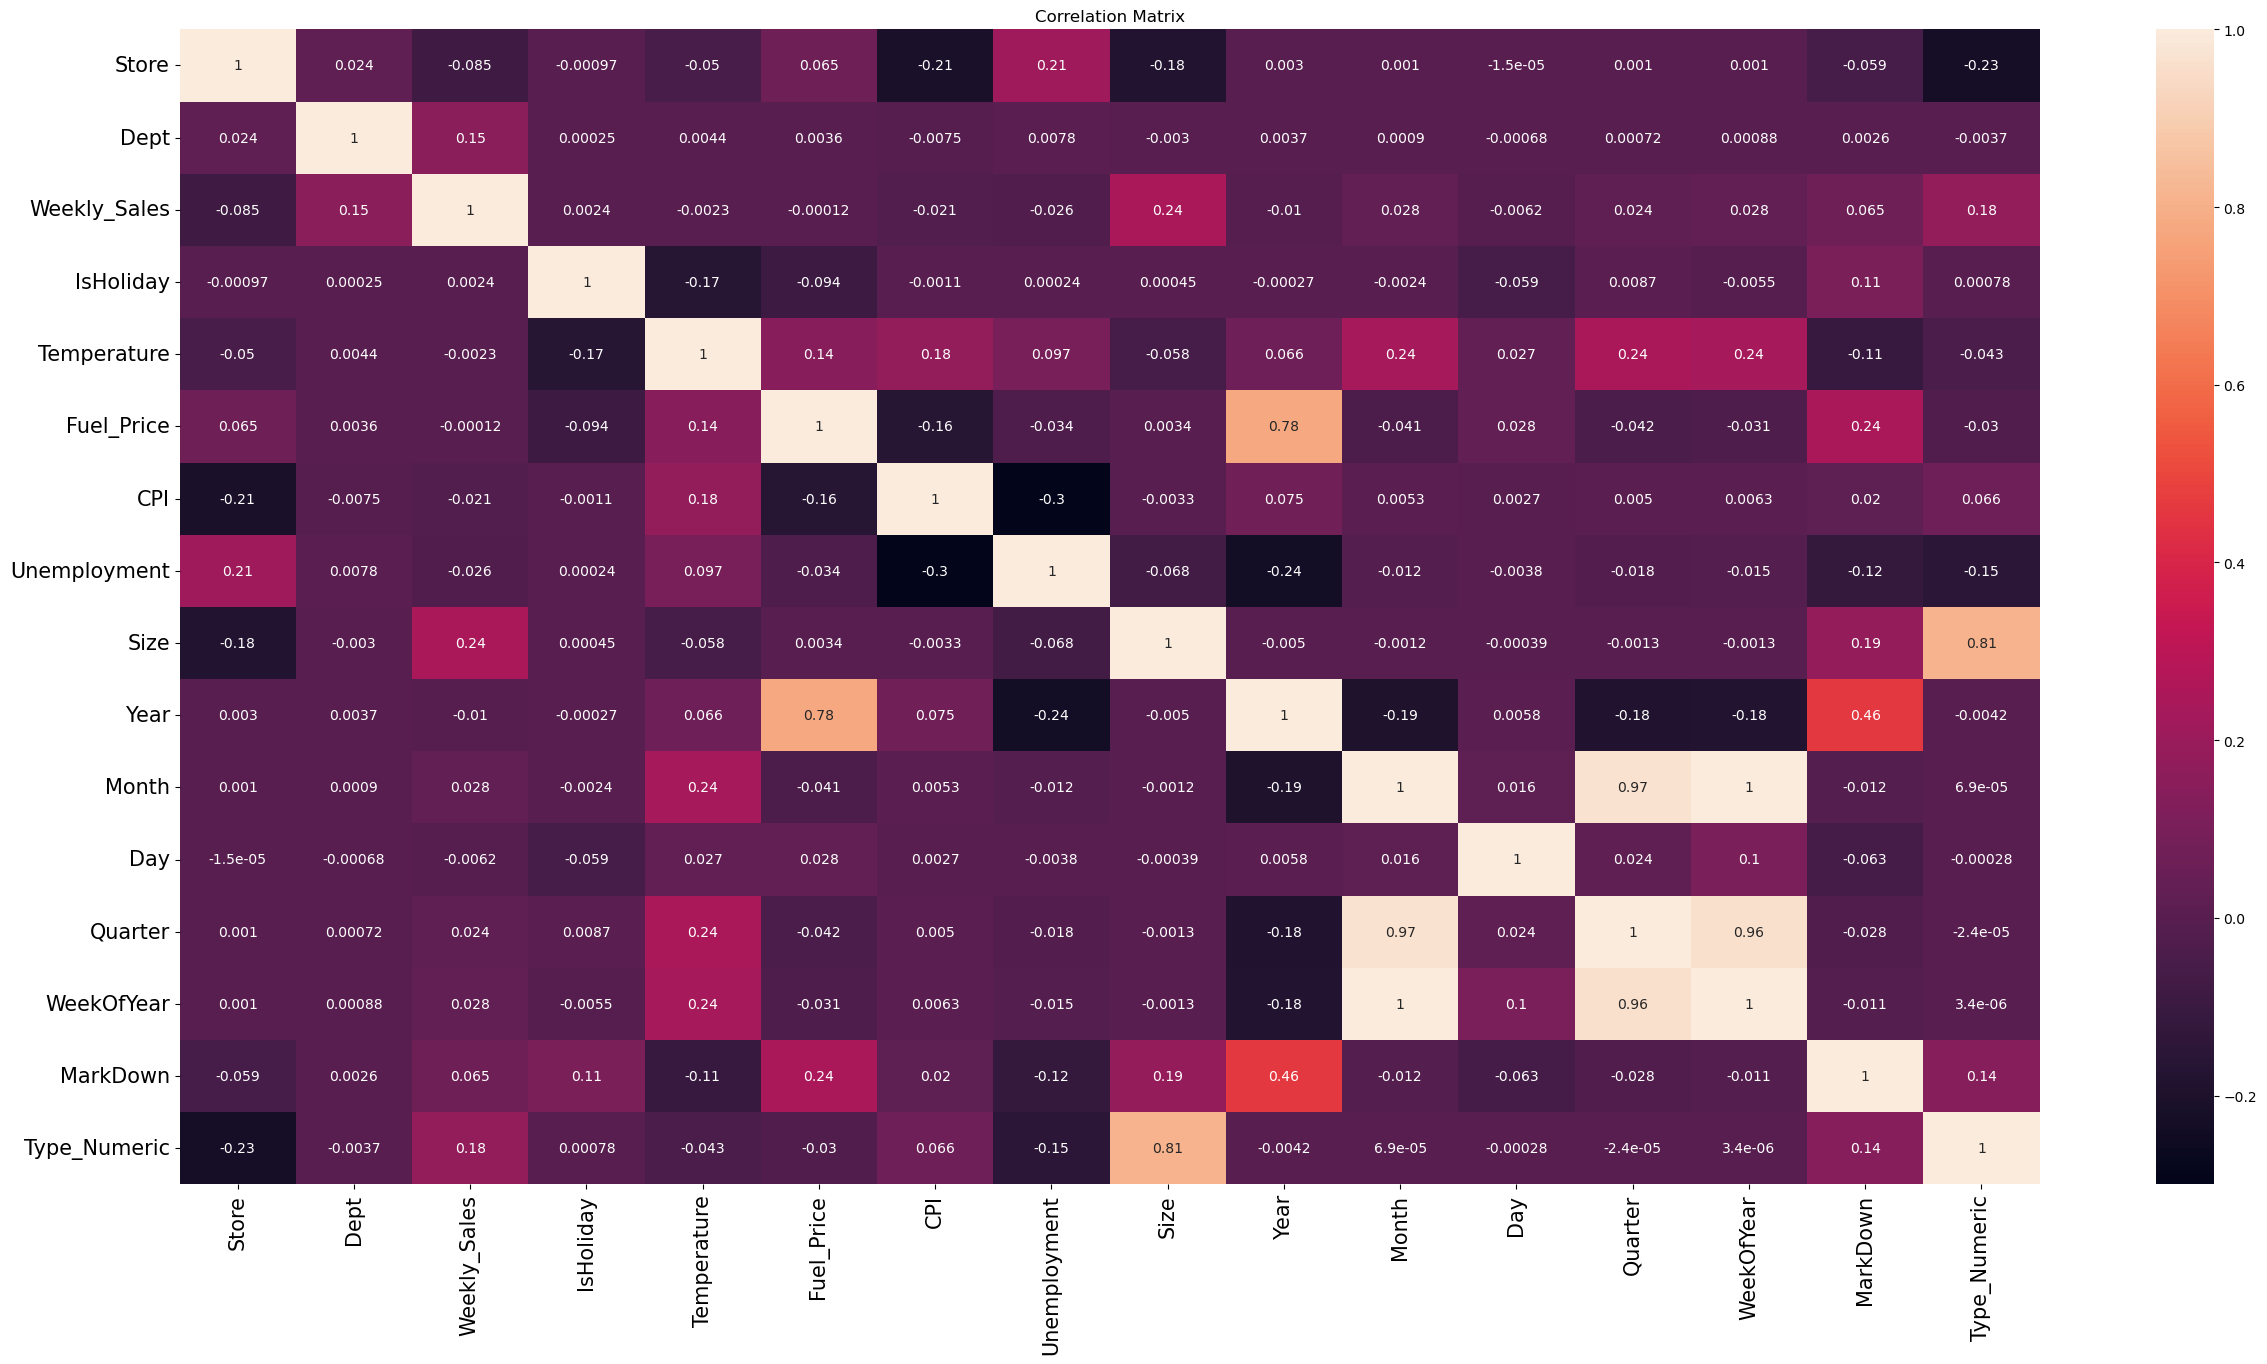

In [53]:
storetype_values = {'A': 3, 'B': 2, 'C': 1}
train_df['Type_Numeric'] = train_df.Type.map(storetype_values)
test_df['Type_Numeric'] = test_df.Type.map(storetype_values)
plt.figure(figsize=(30, 15))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
sns.heatmap(train_df.corr(), annot=True, annot_kws={'size': 10})
plt.title('Correlation Matrix')
plt.show()

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

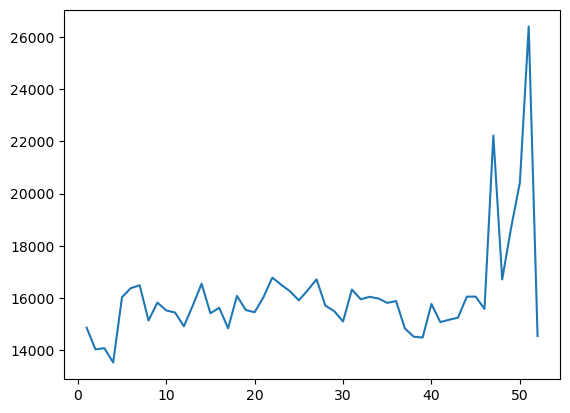

In [54]:
sns.lineplot(data=train_df, x='WeekOfYear', y='Weekly_Sales')
plt.xlabel('Week')
plt.ylabel('Weekly Sales')
plt.title('Trend of Weekly Sales over Time')
plt.show()

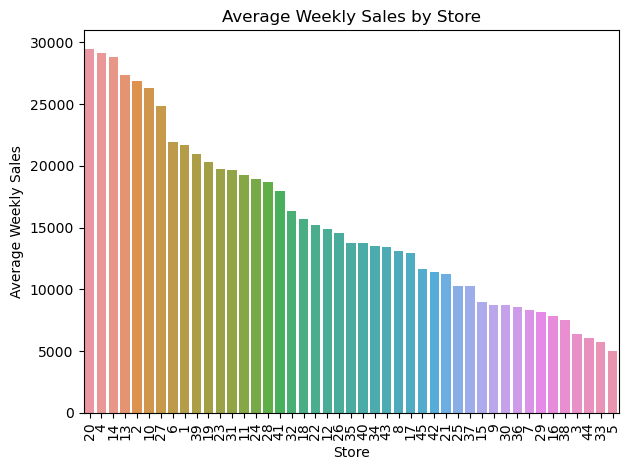

In [32]:
avg_sales_by_store = train_df.groupby('Store')['Weekly_Sales'].mean().reset_index()
sns.barplot(data=avg_sales_by_store, x='Store', y='Weekly_Sales', 
            order = avg_sales_by_store.sort_values('Weekly_Sales',ascending = False)['Store'])
plt.xlabel('Store')
plt.ylabel('Average Weekly Sales')
plt.title('Average Weekly Sales by Store')
plt.xticks(rotation=90)  # Rotate X-axis labels by 45 degrees
plt.tight_layout()  # Adjust layout to prevent label overlapping
plt.show()

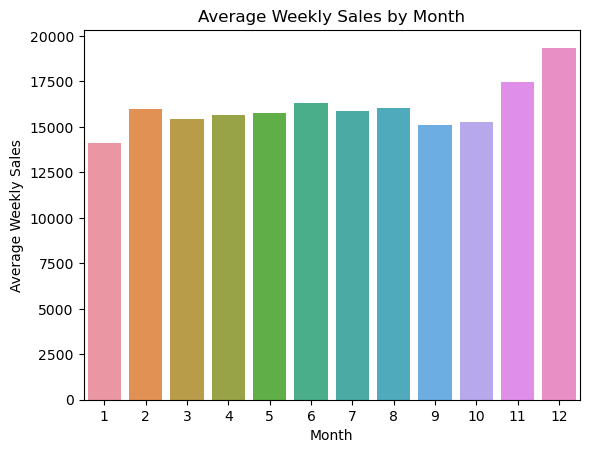

In [33]:
avg_sales_by_month = train_df.groupby('Month')['Weekly_Sales'].mean().reset_index()
sns.barplot(data=avg_sales_by_month, x='Month', y='Weekly_Sales')
plt.xlabel('Month')
plt.ylabel('Average Weekly Sales')
plt.title('Average Weekly Sales by Month')
plt.show()

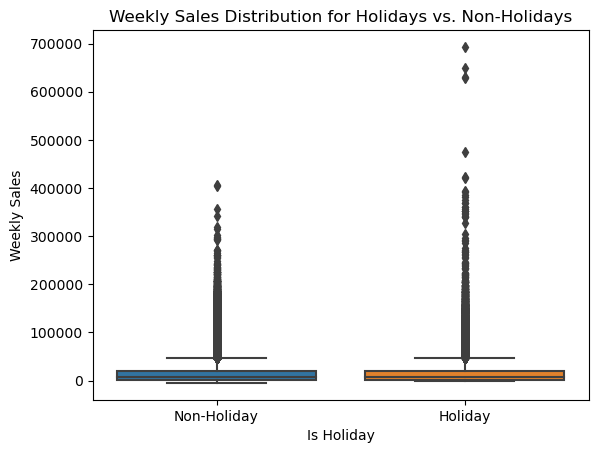

In [34]:
sns.boxplot(data=train_df, x='IsHoliday', y='Weekly_Sales')
plt.xlabel('Is Holiday')
plt.ylabel('Weekly Sales')
plt.title('Weekly Sales Distribution for Holidays vs. Non-Holidays')
plt.xticks([0, 1], ['Non-Holiday', 'Holiday'])
plt.show()

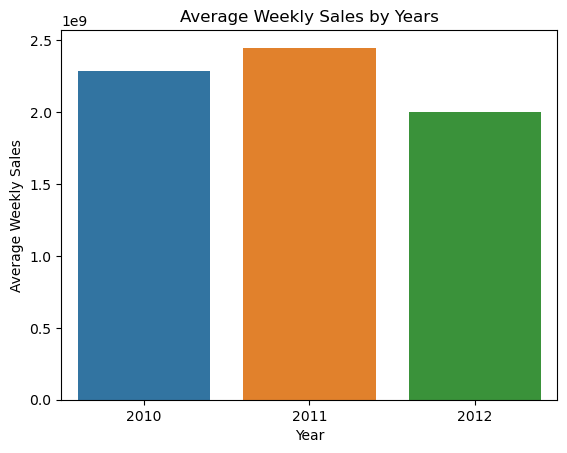

In [35]:
avg_sales_by_year = train_df.groupby('Year')['Weekly_Sales'].sum().reset_index()
# Plot the average weekly sales by years
sns.barplot(data=avg_sales_by_year, x='Year', y='Weekly_Sales')
plt.xlabel('Year')
plt.ylabel('Average Weekly Sales')
plt.title('Average Weekly Sales by Years')
plt.show()

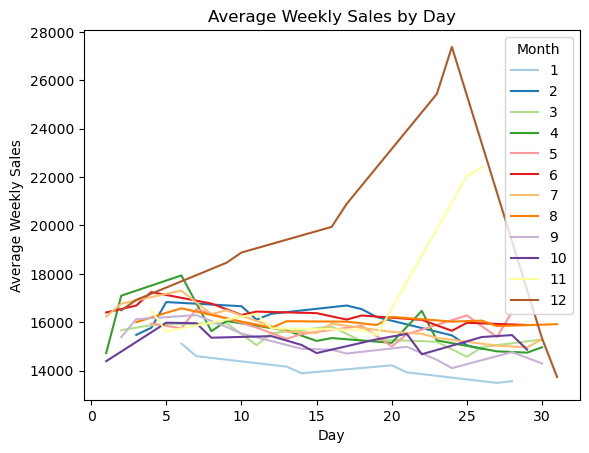

In [36]:
avg_sales_by_month = train_df.groupby(['Day', 'Month'])['Weekly_Sales'].mean().reset_index()
sns.lineplot(data=avg_sales_by_month, x='Day', y='Weekly_Sales', hue = 'Month', palette = sns.color_palette("Paired", 12))
plt.xlabel('Day')
plt.ylabel('Average Weekly Sales')
plt.title('Average Weekly Sales by Day')
plt.show()

In [30]:
train_size = int(.70 * len(train_df))
train_df,val_df = train_df[:train_size], train_df[train_size:]

In [31]:
len(train_df), len(val_df)

(295099, 126471)

In [32]:
input_cols = ['Store', 'Dept', 'IsHoliday', 'Temperature','Fuel_Price', 'CPI', 'Unemployment', 'Type', 'Size', 'Day', 'Month','Year', 'WeekOfYear', 'Quarter', 'MarkDown']
target_col = 'Weekly_Sales'

In [33]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()
val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()

test_inputs = test_df[input_cols].copy()

In [34]:
def num_cat_cols(data):
    
    numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
    categorical_cols = data.select_dtypes('object').columns.tolist()
    
    return numeric_cols, categorical_cols

In [35]:
numeric_cols, categorical_cols = num_cat_cols(train_inputs)

In [36]:
#simple imputer is an estimator used to fill missing values in datasets
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
#onehot encoder used to convert categorical data into binary matrix
from sklearn.preprocessing import OneHotEncoder
imputer = SimpleImputer(strategy='mean').fit(train_inputs[numeric_cols])
train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])

scaler = MinMaxScaler().fit(train_inputs[numeric_cols])
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore').fit(train_inputs[categorical_cols])
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

X_train = train_inputs[numeric_cols+encoded_cols]
X_val = val_inputs[numeric_cols+encoded_cols]
X_test = test_inputs[numeric_cols+encoded_cols]

In [37]:
X_train.head()

,Store,Dept,Temperature,Fuel_Price,CPI,Unemployment,Size,Day,Month,Year,WeekOfYear,Quarter,MarkDown,Type_A,Type_B,Type_C
0,0.0,0.0,0.438092,0.029683,0.840500,0.405118,0.630267,0.133333,0.090909,0.0,0.078431,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.400573,0.017400,0.841941,0.405118,0.630267,0.366667,0.090909,0.0,0.098039,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.414593,0.000000,0.842405,0.405118,0.630267,0.600000,0.090909,0.0,0.117647,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.480746,0.024053,0.842707,0.405118,0.630267,0.833333,0.090909,0.0,0.137255,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.479463,0.056807,0.843008,0.405118,0.630267,0.133333,0.181818,0.0,0.156863,0.0,0.0,1.0,0.0,0.0


In [38]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, r2_score

In [39]:
linear_models_scores = {}

In [40]:
def try_linear_models(model_name, model):
    
    model.fit(X_train, train_targets) # training the model on training data
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_val) # model predictions on validation data
    
    # Training prediction scores
    train_mae = mean_absolute_error(train_targets, train_preds)
    train_rmse = mean_squared_error(train_targets, train_preds, squared=False)
    train_r2 = r2_score(train_targets, train_preds)
    # validation prediction scores
    val_mae = mean_absolute_error(val_targets, val_preds)
    val_rmse = mean_squared_error(val_targets, val_preds, squared=False)
    val_r2 = r2_score(val_targets, val_preds)
    
    linear_models_scores[model_name] = {'mae':[round(train_mae,2), round(val_mae,2)],'rmse':[round(train_rmse,2), round(val_rmse,2)],'r2':[round(train_r2,2), round(val_r2,2)]}
    
    return val_mae, val_rmse, val_r2

In [41]:
model_names = ['linear', 'ridge', 'lasso', 'elasticnet', 'sgd']
models = [LinearRegression(), Ridge(), Lasso(), ElasticNet(), SGDRegressor()]

for i in range(len(models)):
    
    val_mae, val_rmse, val_r2 = try_linear_models(model_names[i], models[i])

In [42]:
pd.DataFrame(linear_models_scores)

,linear,ridge,lasso,elasticnet,sgd
mae,"[15249.86, 12246.22]","[15249.77, 12245.31]","[15249.04, 12240.21]","[15476.35, 14813.25]","[14913.24, 12076.73]"
rmse,"[22886.2, 18878.23]","[22886.21, 18880.55]","[22886.25, 18871.11]","[23363.0, 19475.97]","[22914.38, 19115.92]"
r2,"[0.09, 0.04]","[0.09, 0.04]","[0.09, 0.04]","[0.05, -0.02]","[0.08, 0.02]"


In [44]:
# Dropping columns that are not required for modeling
merge_train = train_df.drop(['Temperature', 'Fuel_Price', 'Type', 'CPI', 'Unemployment', 'Month', 'Day', 'Quarter'], axis=1)
merge_test = test_df.drop(['Temperature', 'Fuel_Price', 'Type', 'CPI', 'Unemployment', 'Month', 'Day', 'Quarter'], axis=1)


In [45]:
merge_train.head()

,Store,Dept,Weekly_Sales,IsHoliday,Size,Year,WeekOfYear,MarkDown
0,1,1,24924.50,0,151315,2010,5.0,0.0
1,1,1,46039.49,1,151315,2010,6.0,0.0
2,1,1,41595.55,0,151315,2010,7.0,0.0
3,1,1,19403.54,1,151315,2010,8.0,0.0
4,1,1,21827.90,0,151315,2010,9.0,0.0


In [46]:
 #Identifying the input and target column (Weekly Sales)
input_column = merge_train.columns.to_list()
input_column.remove('Weekly_Sales')
target_column = 'Weekly_Sales'
inputs = merge_train[input_column].copy()
targets = merge_train[target_column].copy()


In [47]:
inputs = inputs.astype(float)

In [48]:
from sklearn.model_selection import train_test_split
# Training & Validation Sets
train_inputs, val_inputs, train_targets, val_targets = train_test_split(inputs, targets, test_size=0.3, random_state=42)

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
 
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
 
warnings.filterwarnings('ignore')

In [50]:
# Fitting Random Forest Regression to the dataset
rand_forest = RandomForestRegressor(n_estimators=200, random_state=42, oob_score=True)
 
# Fit the regressor with x and y data
rand_forest.fit(train_inputs, train_targets)

RandomForestRegressor(n_estimators=200, oob_score=True, random_state=42)

In [51]:
# Fitting Random Forest Regression to the dataset validation
rand_forest_test = RandomForestRegressor(n_estimators=200, random_state=42, oob_score=True)
 
# Fit the regressor with x and y data
rand_forest_test.fit(val_inputs, val_targets)

RandomForestRegressor(n_estimators=200, oob_score=True, random_state=42)

In [52]:
# Evaluating the model training set
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
 
# Access the OOB Score
oob_score = rand_forest.oob_score_
print(f'Out-of-Bag Score: {oob_score}')
 
# Making predictions on the same data or new data
predictions = rand_forest.predict(train_inputs)
 
# Evaluating the model
mse = mean_squared_error(train_targets, predictions)
print(f'Mean Squared Error: {mse}')
 
r2 = r2_score(train_targets, predictions)
print(f'R-squared: {r2}')


Out-of-Bag Score: 0.973271824192392
Mean Squared Error: 2163428.0447259005
R-squared: 0.9962449557754091


In [53]:
# Evaluating the model validation set
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
 
# Access the OOB Score
oob_score = rand_forest_test.oob_score_
print(f'Out-of-Bag Score: {oob_score}')
 
# Making predictions on the same data or new data
prediction_test = rand_forest_test.predict(val_inputs)
 
# Evaluating the model
mse = mean_squared_error(val_targets, prediction_test)
print(f'Mean Squared Error: {mse}')
 
r2 = r2_score(val_targets, prediction_test)
print(f'R-squared: {r2}')

Out-of-Bag Score: 0.9638833770872101
Mean Squared Error: 2774199.819449446
R-squared: 0.9950900334842246


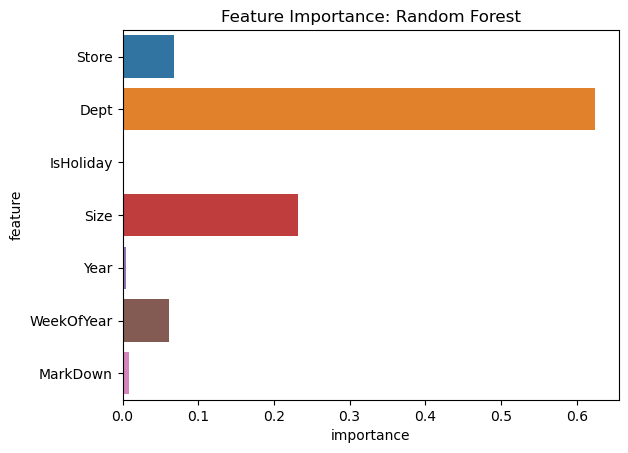

In [54]:
# Random Forest: Feature Importance
importance_df = pd.DataFrame({
'feature': train_inputs.columns,
'importance': rand_forest.feature_importances_})
plt.title('Feature Importance: Random Forest')
sns.barplot(data=importance_df, x='importance', y='feature')
plt.show()

In [55]:
predicted_df = rand_forest.predict(train_inputs)

In [56]:
sampleSubmission = pd.read_csv('sampleSubmission.csv', header = 0)
final_predicted_df = pd.Series(predicted_df)
sampleSubmission['Weekly_Sales'] = final_predicted_df
sampleSubmission.to_csv('RandomForestWeeklySalesPredictions.csv', index=None)

In [57]:
#feature selection for a linear model
from sklearn.linear_model import LinearRegression

lm = LinearRegression().fit(train_inputs, train_targets)
pred_train = lm.predict(train_inputs)

pred_valid = lm.predict(val_inputs)

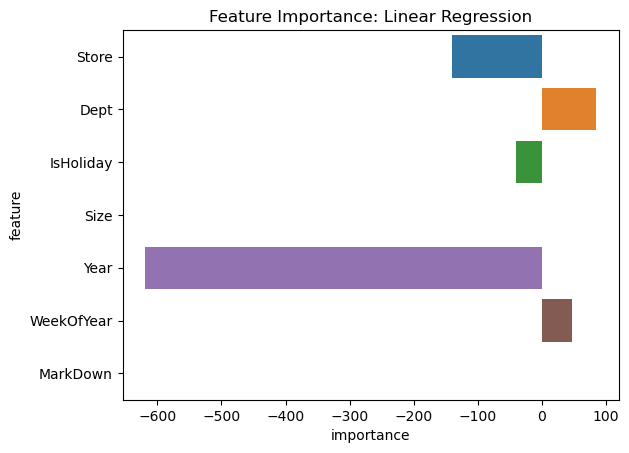

In [58]:
# Linear Regression: Feature Importance with coefficients (p-value)
importance_lm_df = pd.DataFrame({
'feature': train_inputs.columns,
'importance': lm.coef_})
plt.title('Feature Importance: Linear Regression')
sns.barplot(data=importance_lm_df, x='importance', y='feature')
plt.show()